In [1]:
# import general classes for data processing
import ruptures as rpt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

# import our custom classes
import sys
path_to_directory = '../'
if path_to_directory not in sys.path:
    sys.path.append(path_to_directory)
from model import Signal, GestureRecognitionModel
from model import GestureRecognitionDataset

# import for loop and XGboost
from tqdm.notebook import tqdm
from xgboost import XGBClassifier

# import model saving
import joblib

# plotting cmap
from matplotlib.cm import get_cmap

In [2]:
df = pd.read_csv('assets\data.csv')
df_rem = pd.read_csv('assets\data_rem.csv')

In [3]:
train_sets = [1, 2, 3]
subjects = list(df.subject.unique())
subjects.remove("Hanaa")
subjects.remove("Mario")

accuracy_matrix = np.zeros((len(subjects), len(train_sets), 2))

for subject_idx, person_test in  tqdm(enumerate(subjects)):       
    for train_idx, Take_to_test in enumerate(train_sets):
        

        df2 = df[(df['subject'] == person_test)]
        df2_rem = df_rem[(df_rem['subject'] == person_test)]
        
        model1 = XGBClassifier()
        model2 = XGBClassifier()

        selected_columns = ['mav_0', 'mav_1', 'mav_2', 'mav_3', 'mav_4', 'mav_5', 'mav_6', 'mav_7',
                            'rms_0', 'rms_1', 'rms_2', 'rms_3', 'rms_4', 'rms_5', 'rms_6', 'rms_7',
                            'ssc_0', 'ssc_1', 'ssc_2', 'ssc_3', 'ssc_4', 'ssc_5', 'ssc_6', 'ssc_7',
                            'wl_0', 'wl_1', 'wl_2', 'wl_3', 'wl_4', 'wl_5', 'wl_6', 'wl_7', 'var_0',
                            'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'iasd_0',
                            'iasd_1', 'iasd_2', 'iasd_3', 'iasd_4', 'iasd_5', 'iasd_6', 'iasd_7',
                            'iatd_0', 'iatd_1', 'iatd_2', 'iatd_3', 'iatd_4', 'iatd_5', 'iatd_6',
                            'iatd_7']

        df_train = df2[(df2['take'] != Take_to_test)]
        df_test = df2[(df2['take'] == Take_to_test)]

        df_train_rem = df2_rem[(df2_rem['take'] != Take_to_test)]
        df_test_rem = df2_rem[(df2_rem['take'] == Take_to_test)]

        X_train = df_train[selected_columns]
        y_train = df_train['gesture']
        X_test = df_test[selected_columns]
        y_test = df_test['gesture']
        X_train_rem = df_train_rem[selected_columns]
        y_train_rem = df_train_rem['gesture']
        X_test_rem = df_test_rem[selected_columns]
        y_test_rem = df_test_rem['gesture']

        label_encoder = LabelEncoder()
        Y_encoded = label_encoder.fit_transform(y_train)
        Y_encoded_rem = label_encoder.fit_transform(y_train_rem)
        y_train = Y_encoded
        y_train_rem = Y_encoded_rem

        Y_encoded2 = label_encoder.fit_transform(y_test)
        y_test = Y_encoded2
        Y_encoded2_rem = label_encoder.fit_transform(y_test_rem)
        y_test_rem = Y_encoded2_rem

        model1.fit(X_train, y_train)
        model2.fit(X_train, y_train)

        y_pred = model1.predict(X_test)
        y_pred_rem = model2.predict(X_test_rem)

        predictions = [round(value) for value in y_pred]
        predicted_labels_decoded = label_encoder.inverse_transform(predictions)
        predictions_rem = [round(value) for value in y_pred_rem]
        predicted_labels_decoded_rem = label_encoder.inverse_transform(predictions_rem)

        accuracy = accuracy_score(y_test, predictions) * 100
        accuracy_rem = accuracy_score(y_test_rem, predictions_rem) * 100
        print("The accuracy of the model is %.2f%%" % accuracy)
        print("The accuracy of the model with removal is %.2f%%" % accuracy_rem)
        accuracy_matrix[subject_idx, train_idx, 0] = accuracy
        accuracy_matrix[subject_idx, train_idx, 1] = accuracy_rem

0it [00:00, ?it/s]

The accuracy of the model is 74.19%
The accuracy of the model with removal is 75.61%
The accuracy of the model is 73.03%
The accuracy of the model with removal is 73.46%


KeyboardInterrupt: 

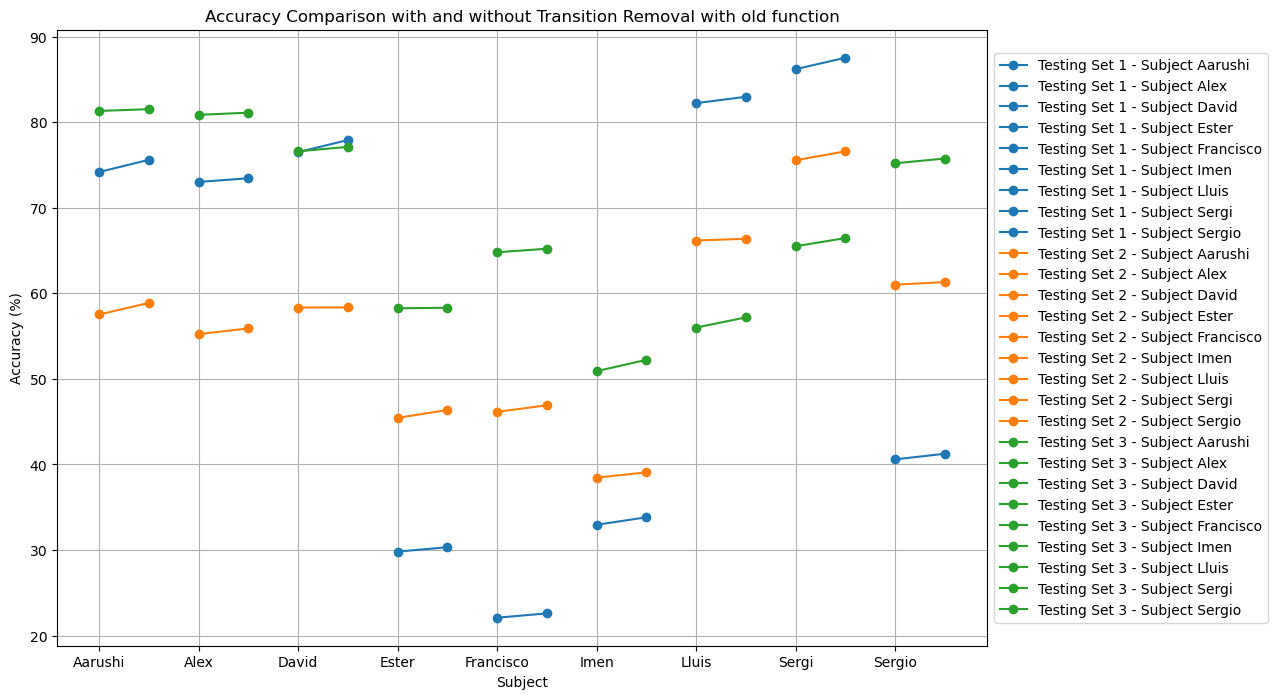

In [5]:
accuracy_matrix = np.load("accuracies with and without transition removal.npy")


reshaped_accuracies = accuracy_matrix.reshape((-1, 2))
cmap = get_cmap('tab10')
plt.figure(figsize=(12, 8))

for i, train_set in enumerate(train_sets):
    for j, subject in enumerate(subjects):

        accuracies = reshaped_accuracies[j + len(subjects) * i]

        color = cmap(i)

        plt.plot([str(subject), str(subject) + '0.1'], accuracies, marker='o', linestyle='-',
                 label=f'Testing Set {train_set} - Subject {subject}', color=color)

plt.xlabel('Subject')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison with and without Transition Removal with old function')
plt.xticks(subjects)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(True)

plt.show()